# Various sequential tests 2

In [59]:
# import libraries
import math
import time
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## 1) Tests of variance of normal distribution

The goal is now to test

H0: $\sigma^2=\sigma^2_0$

against

H1: $\sigma^2=\sigma^2_1$.

First, we assume our random sample to have been drawn from N $(\mu,\sigma^2)$, where $\mu$ is known in prior.

In [117]:
def testN1( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    Z = sum( (x-mu)**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        Z = sum( (x-mu)**2 ) # recalculate Z statistic
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ).reshape( -1, n ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False

In [121]:
alpha = 0.05
beta = 0.05

mu = 0
sigma = 4

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( sigma0**(-1) - sigma1**(-1) )

n = 5

print( testN1( ha, hb, s, mu, sigma, n = 5, verbose = True ) )

data = 
 [[-0.841  0.036 -0.6    0.665  1.739]
 [ 1.386 -0.061  0.789  2.506  1.39 ]
 [-0.33   0.982 -0.182  0.43   0.385]]
2 sample extensions required
False


It is however not necessary to know $\mu$ in advance. Just run the following test and see yourself.


In [139]:
def testN2( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    m = np.mean(x)
    Z = sum( ( x - m )**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        m = np.mean(x) # recalculate mean
        Z = sum( ( x - m )**2 ) # recalculate Z statistic
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False

In [144]:
alpha = 0.05
beta = 0.05

sigma = 1

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( sigma0**(-1) - sigma1**(-1) )

mu = np.round( np.random.uniform( 0.0, 10.0, 1), decimals = 0 ) # so that mu is truly unknown but not too exotic
print( testN2( ha, hb, s, mu, sigma, n = 5, verbose = True ) )
print( 'Generated from mu =', mu)

data = 
 [ 0.585  0.403 -0.974  1.267  1.57   1.288  0.643  2.683  1.778  2.143]
1 sample extensions required
False
Generated from mu = [1.]


Let's, examine the mean size of the sample each tests needs to decide.

We run the tests TODO times for a sequence of values $\sigma_1^2$ and see how large samples were required on average for the tests to decide.

Operational characteristics may be of interest as well.

Let's simulate them too.

We run 

Computational time 10.184451580047607 seconds


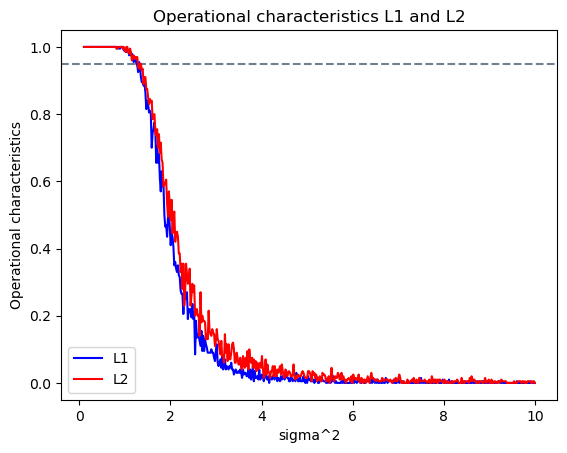

In [153]:
sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( sigma0**(-1) - sigma1**(-1) )

start = time.time()
N_pts = 500
N_tests = 200
arr_L1 = np.empty( N_pts )
arr_L2 = np.empty( N_pts )
arr_sigma = np.linspace( 0.1, 10.0, N_pts )

for i in range( N_pts ):
    arr_temp = 1 - np.array( [ testN1( ha, hb, s, mu, arr_sigma[ i ], n=5 ) for _ in range( N_tests ) ] )
    arr_L1[ i ] = np.sum( arr_temp ) / N_tests
    arr_temp = 1 - np.array( [ testN2( ha, hb, s, mu, arr_sigma[ i ], n=5 ) for _ in range( N_tests ) ] )
    arr_L2[ i ] = np.sum( arr_temp ) / N_tests
    
end = time.time()
print( 'Computational time', end - start, 'seconds')

plt.axhline(y=0.95, color='lightsteelblue', linestyle='--')
plt.plot(arr_sigma, arr_L1, color='blue', label='L1')
plt.plot(arr_sigma, arr_L2, color='red', label='L2')
plt.xlabel('sigma^2')
plt.ylabel('Operational characteristics')
plt.title('Operational characteristics L1 and L2')
plt.legend()

plt.show()

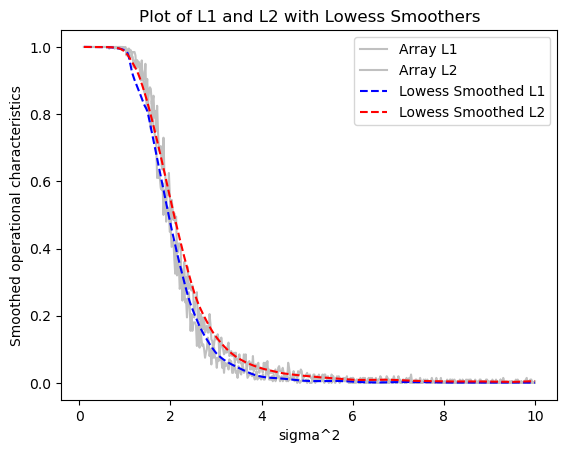

In [152]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed_L1 = lowess(arr_L1, arr_sigma, frac=0.1, return_sorted=False)
smoothed_L2 = lowess(arr_L2, arr_sigma, frac=0.1, return_sorted=False)

plt.plot(arr_sigma, arr_L1, color='silver', label='Array L1')
plt.plot(arr_sigma, arr_L2, color='silver', label='Array L2')

plt.plot(arr_sigma, smoothed_L1, color='blue', linestyle='--', label='Lowess Smoothed L1')
plt.plot(arr_sigma, smoothed_L2, color='red', linestyle='--', label='Lowess Smoothed L2')

plt.xlabel('sigma^2')
plt.ylabel('Smoothed operational characteristics')
plt.title('Plot of L1 and L2 with Lowess Smoothers')
plt.legend()

plt.show()

Finally, compare the tests head-to-head. Both tests run TODO times.

In the first scenario, the tests are not supposed to reject $H_0$.

Precision: [0.9953 0.999 ]
Computation time: [1.8034277  4.85778737]


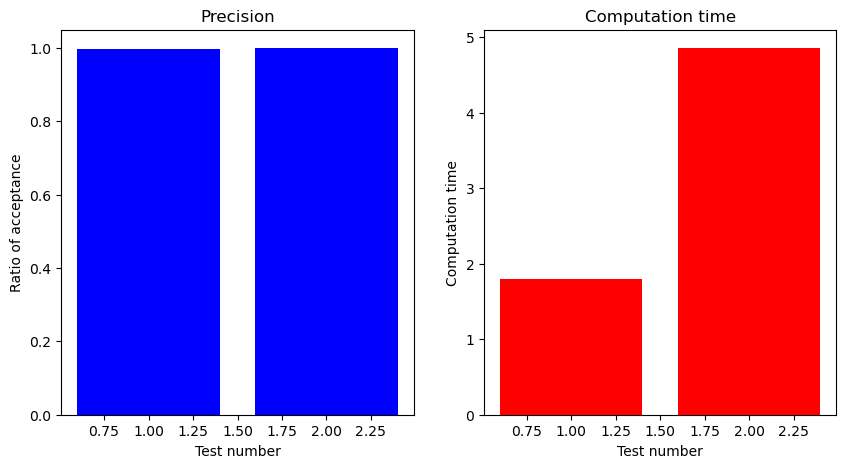

In [42]:
N_tests = 10000

alpha = 0.05
beta = 0.05

mu1 = 0
mu2 = np.random.uniform( 0.0, 1.0, 1 )
sigma = 1 # rejection NOT expected

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( sigma0**(-2) - sigma1**(-2) )
hb = 2*b / ( sigma0**(-2) - sigma1**(-2) )
s = 2*math.log( sigma1/sigma0) / ( sigma0**(-2) - sigma1**(-2) )

start_t1 = time.time()
arr_res1 = np.array( [ testN1( ha, hb, s, mu1, sigma ) for _ in range( N_tests ) ] )
start_t2 = time.time()
arr_res2 = np.array( [ testN2( ha, hb, s, mu2, sigma ) for _ in range( N_tests ) ] )
end_t = time.time()

y1 = ( N_tests - np.sum( arr_res1 ) ) / N_tests
y2 = ( N_tests - np.sum( arr_res2 ) ) / N_tests

arr_x = np.array( [ 1, 2 ] )
arr_y = np.array( [ y1, y2 ] )
arr_t = np.array( [
    start_t2 - start_t1,
    end_t - start_t2
] )

print( 'Precision:', arr_y )
print( 'Computation time:', arr_t )


fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )

axs[0].bar( arr_x, arr_y, color='blue' )
axs[0].set_title( 'Precision' )
axs[0].set_xlabel( 'Test number' )
axs[0].set_ylabel( 'Ratio of acceptance' )

axs[1].bar( arr_x, arr_t, color='red' )
axs[1].set_title( 'Computation time' )
axs[1].set_xlabel( 'Test number' )
axs[1].set_ylabel( 'Computation time' )

plt.show()

We can do a similar thing in a world where the tests should reject.

Precision: [0.6129 0.4307]
Computation time: [2.19501019 8.1073153 ]


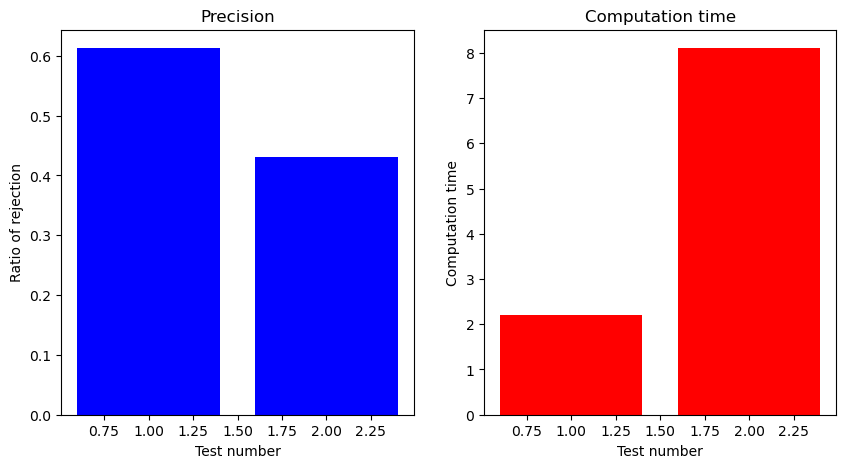

In [43]:
N_tests = 10000

alpha = 0.05
beta = 0.05

mu1 = 0
mu2 = np.random.uniform( 0.0, 1.0, 1 )
sigma = 4 # rejection is expected now

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( sigma0**(-2) - sigma1**(-2) )
hb = 2*b / ( sigma0**(-2) - sigma1**(-2) )
s = 2*math.log( sigma1/sigma0) / ( sigma0**(-2) - sigma1**(-2) )

start_t1 = time.time()
arr_res1 = np.array( [ testN1( ha, hb, s, mu1, sigma ) for _ in range( N_tests ) ] )
start_t2 = time.time()
arr_res2 = np.array( [ testN2( ha, hb, s, mu2, sigma ) for _ in range( N_tests ) ] )
end_t = time.time()

y1 = ( np.sum( arr_res1 ) ) / N_tests
y2 = ( np.sum( arr_res2 ) ) / N_tests

arr_x = np.array( [ 1, 2 ] )
arr_y = np.array( [ y1, y2 ] )
arr_t = np.array( [
    start_t2 - start_t1,
    end_t - start_t2
] )

print( 'Precision:', arr_y )
print( 'Computation time:', arr_t )


fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )

axs[0].bar( arr_x, arr_y, color='blue' )
axs[0].set_title( 'Precision' )
axs[0].set_xlabel( 'Test number' )
axs[0].set_ylabel( 'Ratio of rejection' )

axs[1].bar( arr_x, arr_t, color='red' )
axs[1].set_title( 'Computation time' )
axs[1].set_xlabel( 'Test number' )
axs[1].set_ylabel( 'Computation time' )

plt.show()